# 3-6. ÌîÑÎ°úÏ†ùÌä∏: Í≥†ÏñëÏù¥ ÏàòÏóº Ïä§Ìã∞Ïª§ ÎßåÎì§Í∏∞

# Step 1. Ïä§Ìã∞Ïª§ Íµ¨ÌïòÍ∏∞ or ÎßåÎì§Í∏∞

In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib
print("ÎÅù")

ÎÅù


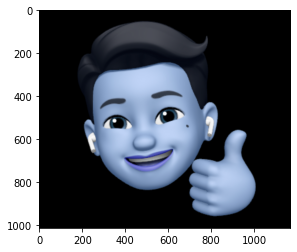

In [2]:
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/ÏÜêÏäπÏö∞ÎØ∏Î™®ÏßÄ.png'
img_bgr = cv2.imread(my_image_path, 1)    # OpenCVÎ°ú Ïù¥ÎØ∏ÏßÄÎ•º Î∂àÎü¨ÏòµÎãàÎã§
img_show = img_bgr.copy()      # Ï∂úÎ†•Ïö© Ïù¥ÎØ∏ÏßÄÎ•º Îî∞Î°ú Î≥¥Í¥ÄÌï©ÎãàÎã§
plt.imshow(img_bgr)
plt.show()


# Step 2. ÏñºÍµ¥ Í≤ÄÏ∂ú & ÎûúÎìúÎßàÌÅ¨ Í≤ÄÏ∂ú ÌïòÍ∏∞

* ÏñºÍµ¥ Í≤ÄÏ∂ú

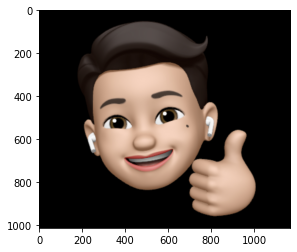

In [3]:
# plt.imshow Ïù¥Ï†ÑÏóê RGB Ïù¥ÎØ∏ÏßÄÎ°ú Î∞îÍæ∏Îäî Í≤ÉÏùÑ ÏûäÏßÄÎßàÏÑ∏Ïöî. 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()


In [4]:
# detectorÎ•º ÏÑ†Ïñ∏Ìï©ÎãàÎã§
detector_hog = dlib.get_frontal_face_detector()
print("üå´üõ∏")

üå´üõ∏


In [5]:
#detector_hogÎ•º Ïù¥Ïö©Ìï¥ÏÑú ÏñºÍµ¥Ïùò bounding boxÎ•º Ï∂îÏ∂ú

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)
print("üå´üõ∏")

üå´üõ∏


rectangles[[(245, 348) (707, 811)]]


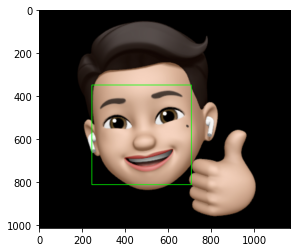

In [6]:
# Ï∞æÏùÄ ÏñºÍµ¥ ÏòÅÏó≠ Î∞ïÏä§ Î¶¨Ïä§Ìä∏
# Ïó¨Îü¨ ÏñºÍµ¥Ïù¥ ÏûàÏùÑ Ïàò ÏûàÏäµÎãàÎã§
print(dlib_rects)   

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

* ÎûúÎìúÎßàÌÅ¨ Í≤ÄÏ∂ú


In [7]:
# landmark Î™®Îç∏ÏùÑ Î∂àÎü¨ÏòµÎãàÎã§.

model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
print("üå´üõ∏")

üå´üõ∏


In [8]:
list_landmarks = []

# ÏñºÍµ¥ ÏòÅÏó≠ Î∞ïÏä§ ÎßàÎã§ face landmarkÎ•º Ï∞æÏïÑÎÉÖÎãàÎã§
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    # face landmark Ï¢åÌëúÎ•º Ï†ÄÏû•Ìï¥Îë°ÎãàÎã§
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


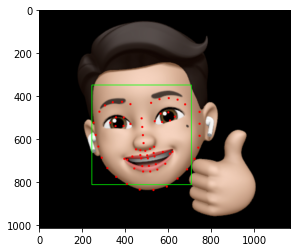

In [9]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 5, (0, 0, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

# Step 3. Ïä§Ìã∞Ïª§ Ï†ÅÏö© ÏúÑÏπò ÌôïÏù∏ÌïòÍ∏∞

In [10]:
#ÏΩîÏùò Ï§ëÏã¨Ï†ê
#Î∞ïÏä§Ïùò ÌÅ¨Í∏∞ = ÏôïÍ¥ÄÏùò ÌÅ¨Í∏∞

for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # ÏΩîÏùò indexÎäî 30 ÏûÖÎãàÎã§
    x = landmark[30][0]
    y = landmark[30][1]
    w = h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(485, 618)
(x,y) : (485,618)
(w,h) : (463,463)


(463, 463, 3)


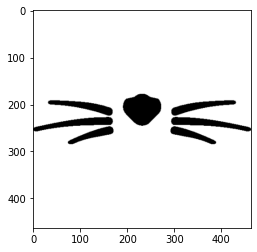

In [11]:
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w, h))
print(img_sticker.shape)

plt.imshow(img_sticker)
plt.show()


In [12]:
refined_x = x - w // 2
refined_y = y - h //2
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (254,387)


In [13]:
# ÏõêÎ≥∏ Ïù¥ÎØ∏ÏßÄÏùò Î≤îÏúÑÎ•º Î≤óÏñ¥ÎÇú Ïä§Ìã∞Ïª§ Î∂ÄÎ∂ÑÏùÑ Ï†úÍ±∞

if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0

print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (254,387)


# Step 4. Ïä§Ìã∞Ïª§ Ï†ÅÏö©ÌïòÍ∏∞

(463, 463, 3)


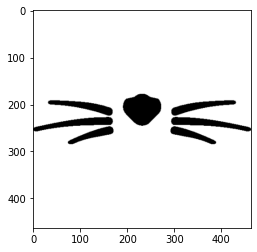

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [14]:
# 255Î°ú Î∞îÍøîÏïº ÌïòÎäî Ïù¥Ïú† -> Î≥¥ÌÜµ 0Ïù¥ ÌïòÏñÄÏÉâÏù¥ÎÇò cv2.openÏúºÎ°ú Ïù∏Ìï¥ 255Í∞Ä ÌïòÏñÄÏÉâÏù¥Îã§
print(img_sticker.shape)

plt.imshow(img_sticker)
plt.show()
np.array(img_sticker)
# np.where(img_sticker==255, sticker_area,img_sticker).astype(np.uint8)

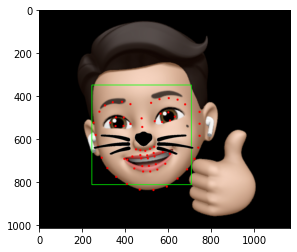

In [15]:
# ÏõêÎ≥∏ Ïù¥ÎØ∏ÏßÄÏóê Ïä§Ìã∞Ïª§Î•º Ï†ÅÏö©Ìï©ÎãàÎã§.

# Í∏∏Ïñ¥ÏÑú Î≥µÏû°Ìï¥ Î≥¥Ïù¥ÏßÄÎßå img_show[from:to] ÌòïÏãùÏûÖÎãàÎã§

#img_show Î∞ïÏä§Î¶¨Ïä§Ìä∏ÏôÄ ÎûúÎìúÎßàÌÅ¨

sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255, sticker_area,img_sticker).astype(np.uint8)
#     np.where(img_sticker==0, img_sticker, sticker_area).astype(np.uint8)


plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()


# np.where(img_sticker==255, sticker_area,img_sticker).astype(np.uint8) // 

# np.where
# a = np.array([1, 2, 3, 10, 20, 30, 0.1, 0.2])
# np.where(a >= 10, 0, a)
# array([1. , 2. , 3. , 0. , 0. , 0. , 0.1, 0.2])
# 10Î≥¥Îã§ ÌÅ¨Í±∞ÎÇò Í∞ôÏùÄ Í∞íÏùÄ 0ÏúºÎ°ú Î∞îÎÄåÍ≥† , ÏïÑÎãå Í∞íÏùÄ Í∑∏ÎåÄÎ°ú ÎëîÎã§.


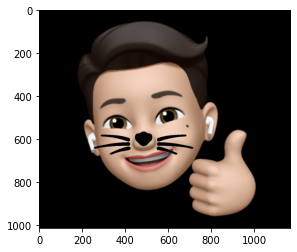

In [16]:
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))

plt.show()

## 5. Ïó¨Îü¨ Ï¢ÖÎ•òÏùò Ïù¥ÎØ∏ÏßÄ ÌÖåÏä§Ìä∏

* ÏñºÍµ¥ Í∞ÅÎèÑÏóê Îî∞Îùº Ïä§Ìã∞Ïª§Í∞Ä Ïñ¥ÎñªÍ≤å Î≥ÄÌï¥ÏïºÌï†ÍπåÏöî?
* Î©ÄÎ¶¨ÏÑú Ï¥¨ÏòÅÌïòÎ©¥ Ïôú ÏïàÎê†ÍπåÏöî? 
* ÏòÜÏúºÎ°ú ÎàÑÏõåÏÑú Ï¥¨ÏòÅÌïòÎ©¥ Ïôú ÏïàÎê†ÍπåÏöî?

ÏñºÍµ¥ Í∞ÅÎèÑ Î≥ÄÌôò

In [17]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import dlib


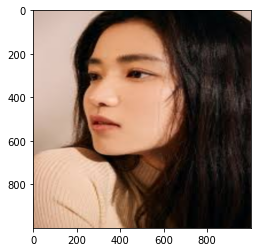

rectangles[[(110, 110) (664, 665)]]


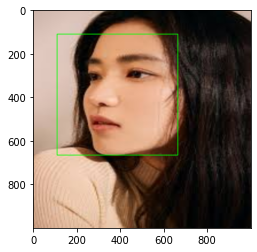

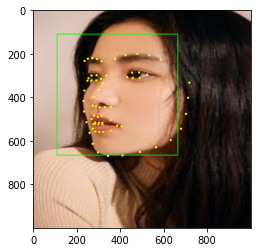

In [18]:
# ÏõêÎ≥∏ Ïù¥ÎØ∏ÏßÄ Î∂àÎü¨Ïò§Í∏∞
# my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/ÏÜêÏäπÏö∞ÎØ∏Î™®ÏßÄ.png'
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/rotate.png'

img_bgr = cv2.imread(my_image_path)
img_bgr = cv2.resize(img_bgr, (1000, 1000))
img_show = img_bgr.copy()
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
img_rgb = cv2.resize(img_rgb, (1000, 1000))
plt.imshow(img_rgb)
plt.show()

detector_hog = dlib.get_frontal_face_detector()
dlib_rects = detector_hog(img_rgb, 1)

print(dlib_rects)

# Ïù¥ÎØ∏ÏßÄ ÏúÑÏóê ÏñºÍµ¥Ïùò box Ï∂úÎ†•
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    
    cv2.rectangle(img_show, (l, t), (r, b), (0, 255, 0), 2, lineType=cv2.LINE_AA)
    
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

# landmark Î™®Îç∏ Î∂àÎü¨Ïò§Í∏∞
model_path = os.getenv("HOME") + '/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 5, (0, 255, 255), -1)
        
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

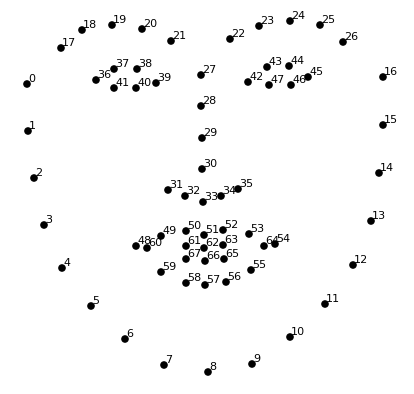

### ÏòÅÏÉÅÏùò ÌöåÏ†Ñ - cv2.getRotationMatrix2D


cv2.getRotationMatrix2D(center, angle, scale) -> retval


+ center: ÌöåÏ†Ñ Ï§ëÏã¨ Ï¢åÌëú. (x, y) ÌäúÌîå
+ angle : (Î∞òÏãúÍ≥Ñ Î∞©Ìñ•) ÌöåÏ†Ñ Í∞ÅÎèÑ(degree). ÏùåÏàòÎäî ÏãúÍ≥Ñ Î∞©Ìñ•.
+ scale: Ï∂îÍ∞ÄÏ†ÅÏù∏ ÌôïÎåÄ ÎπÑÏú®
+ retval: 2x3 Ïñ¥ÌååÏù∏ Î≥ÄÌôò ÌñâÎ†¨

degree:  3.8460300900474285
(281, 398)
(x, y): (4, 121)
(w, h): (555, 555)


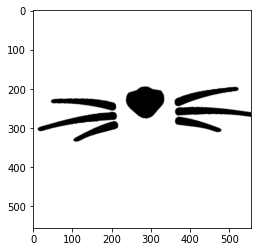

In [19]:
# Ïù¥ÎØ∏ÏßÄ ÏÜç Ïù∏Î¨ºÏùò ÏñºÍµ¥Ïù¥ ÌãÄÏñ¥ÏßÑ Í∞ÅÎèÑ Í≥ÑÏÇ∞
import math

for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    x_tilt = abs(landmark[42][0] - landmark[39][0])
    y_tilt = abs(landmark[42][1] - landmark[39][1])
    z_tilt = math.sqrt(x_tilt ** 2 + y_tilt ** 2)
    degree_tilt = math.degrees(math.acos(x_tilt / z_tilt)) #Î∞òÏãúÍ≥ÑÎ∞©Ìñ•
    
    print('degree: ', degree_tilt)

# Ïä§Ìã∞Ïª§ ÏúÑÏπò Î∞è ÌÅ¨Í∏∞ Í≥ÑÏÇ∞
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print(landmark[30])
    x = landmark[30][0] - dlib_rect.width() // 2
    y = landmark[30][1] - dlib_rect.width() // 2
    w = dlib_rect.width()
    h = dlib_rect.width()
    print('(x, y): (%d, %d)'%(x, y))
    print('(w, h): (%d, %d)'%(w, h))

# Ïä§Ìã∞Ïª§ Ïù¥ÎØ∏ÏßÄÎ•º ÏùΩÏñ¥ÏôÄÏÑú resize
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w, h))

tilt = cv2.getRotationMatrix2D((x, y), degree_tilt, 1)
tilt_sticker = cv2.warpAffine(img_sticker, tilt, (w, h), borderValue=(255,255,255))
tilt_sticker = cv2.resize(tilt_sticker, (w, h))

plt.imshow(tilt_sticker)
plt.show()

# Ïù¥ÎØ∏ÏßÄ ÏãúÏûëÏ†êÏù∏ top-left Ï¢åÌëúÎ°ú x, y Ï¢åÌëú Î≥ÄÍ≤Ω
refined_x = x 
refined_y = y 


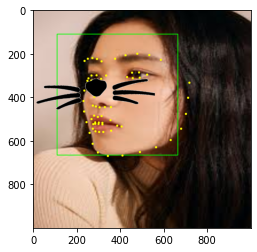

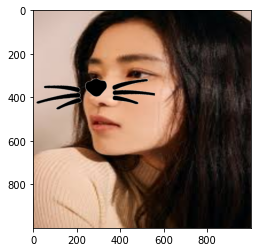

In [20]:
# Ïä§Ìã∞Ïª§ Ï†ÅÏö©
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(tilt_sticker==255, sticker_area,tilt_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

# Í≤∞Í≥º Ïù¥ÎØ∏ÏßÄ Ï∂úÎ†•
sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(tilt_sticker==255, sticker_area,tilt_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

### Ïä§Ìã∞Ïª§ ÌöåÏ†Ñ
- Ïä§Ìã∞Ïª§ ÌöåÏ†Ñ Î∂ÄÌò∏Ïóê ÎåÄÌïú Í≥†Î†§Î•º Î™ªÌï¥Ï§ÄÍ≤å ÏïÑÏâΩÎã§.

ÌÅ¥ÎûòÏä§Î•º Ï†ÅÏö©ÌïòÏó¨ ÏΩîÎìúÎ•º Í∞ÑÎã®ÌïòÍ≤å ÎßåÎì† Ïö∞ÏàòÏûêÎ£åÎ°ú Í≥µÎ∂ÄÌï¥Î≥¥ÏïòÎã§.

# Ï∞∏Í≥†ÏûêÎ£å ÌÅ¥ÎûòÏä§Î°ú Ï†ïÏùò

In [21]:
import cv2
import dlib
import matplotlib.pyplot as plt
import numpy as np


class CatWhiskersSticker:
    """

    Methods:
        show_original_image: ÏõêÎ≥∏ Ïù¥ÎØ∏ÏßÄ Ï∂úÎ†•
        show_face_rectangle: Ï∞æÏùÄ ÏñºÍµ¥ ÏòÅÏó≠ÏùÑ ÏÇ¨Í∞ÅÌòïÏúºÎ°ú Î≥¥Ïó¨Ï§ÄÎã§
        print_info: 
    """

    detector_hog = dlib.get_frontal_face_detector() # detector ÏÑ†Ïñ∏

    def __init__(self, img_dir, landmark_model, cat_sticker):
        self.img_bgr = cv2.imread(img_dir)
        self.img_show = self.img_bgr.copy()  # Ï∂úÎ†•Ïö© Ïù¥ÎØ∏ÏßÄ Î≥ÑÎèÑ Î≥¥Í¥Ä
        self.img_rgb = cv2.cvtColor(self.img_bgr, cv2.COLOR_BGR2RGB) # RGB Ïù¥ÎØ∏ÏßÄ
        self.dlib_rects = detector_hog(self.img_rgb, 1)
        self.face_points = [] # ÏñºÍµ¥ Ï¢åÌëú
        self.landmark_predictor = dlib.shape_predictor(landmark_model)
        self.list_landmarks = [] # ÎûúÎìúÎßàÌÅ¨ Ï¢åÌëú Î¶¨Ïä§Ìä∏
        self.nose_points = [] # 30Î≤à ÎûúÎìúÎßàÌÅ¨ ÏúÑÏπò
        self.face_width_height = [] # ÏÇ¨Í∞ÅÌòïÏúºÎ°ú Ï∞æÏùÄ ÏñºÍµ¥Ïùò ÎÑìÏù¥ÏôÄ ÎÜíÏù¥
        self.get_face_rectangle()
        self.get_landmarks()
        self.img_sticker = cv2.imread(cat_sticker)
        self.resized_stickers = [] # Î¶¨ÏÇ¨Ïù¥Ï¶àÎêú Ïä§Ìã∞Ïª§Îì§
        self.resize_sticker()
        self.src_points = [] # Ïä§Ìã∞Ïª§ Î≥ÄÌôòÏ†Ñ Ï¢åÌëú
        self.dst_points = [] # Ïä§Ìã∞Ïª§ Î≥ÄÌôòÌõÑ Ï¢åÌëú
        self.get_src_points()
        self.person_num = len(self.dlib_rects)
        self.get_dst_points()
        # self.perspective_transform_matrix = np.array([])
        # self.get_matrix()


    def put_cat_whiskers(self):
        for i in range(self.person_num):
            transformed_sticker = None
            left, top, _, _ = self.face_points[i]
            width, height = self.face_width_height[i]
            image_sticker = self.resized_stickers[i]

            src = np.float32(self.src_points[i])
            dst = np.float32(self.dst_points[i])
            # print("POINT: ", src, dst)

            matrix = cv2.getPerspectiveTransform(src, dst)
            # print(matrix)

            transformed_sticker = cv2.warpPerspective(image_sticker, matrix, (width, height),
                         borderValue = [255, 255, 255, 255]) # Í∞ÄÏû• ÏûêÎ¶¨ ÌîΩÏÖÄ ÌôïÏû•ÏùÄ Ìù∞ÏÉâ

            sticker_area = self.img_bgr[top : top + transformed_sticker.shape[0], left : left + transformed_sticker.shape[1]]
            self.img_bgr[top : top + transformed_sticker.shape[0], left : left + transformed_sticker.shape[1]] = \
            np.where(
                transformed_sticker == 0, cv2.addWeighted(transformed_sticker, 0.8, sticker_area, 0.2, 0), sticker_area
            ).astype(np.uint8)

        plt.imshow(cv2.cvtColor(self.img_bgr, cv2.COLOR_BGR2RGB))
        plt.show()
        

    def get_src_points(self):
        for w, _ in self.face_width_height:
            src_point = [
                (int(w * 0.46), int(w * 0.4)),
                (int(w * 0.54), int(w * 0.4)),
                (int(w * 0.4), int(w * 0.57)),
                (int(w * 0.6), int(w * 0.57)),
            ]
            self.src_points.append(src_point)
    
    def get_dst_points(self):
        for i in range(self.person_num):
            l, t, _, _ = self.face_points[i]
            landmark = self.list_landmarks[i]

            dst_point = [
                (
                    (landmark[31][0] + landmark[28][0]) // 2 - l,
                    (landmark[31][1] + landmark[28][1]) // 2 - t,
                ),
                (
                    (landmark[35][0] + landmark[28][0]) // 2 - l,
                    (landmark[35][1] + landmark[28][1]) // 2 - t,
                ),
                (
                    (landmark[31][0] + landmark[49][0]) // 2 - l,
                    (landmark[31][1] + landmark[49][1]) // 2 - t,
                ),
                (
                    (landmark[35][0] + landmark[53][0]) // 2 - l,
                    (landmark[35][1] + landmark[53][1]) // 2 - t,
                ),
            ]
            self.dst_points.append(dst_point)
        

    
    def resize_sticker(self):
        for w, h in self.face_width_height:
            resized_sticker = cv2.resize(self.img_sticker, (w, h))
            self.resized_stickers.append(resized_sticker)

    def get_landmarks(self):
        # ÎûúÎìúÎßàÌÅ¨ ÏúÑÏπò Íµ¨ÌïúÎã§
        for dlib_rect in self.dlib_rects:
            points = landmark_predictor(self.img_rgb, dlib_rect)
            list_points = list(map(lambda p: (p.x, p.y), points.parts()))
            self.list_landmarks.append(list_points)

        for dlib_rect, landmark in zip(self.dlib_rects, self.list_landmarks):
            # ÎûúÎìúÎßàÌÅ¨ÏóêÏÑú 30Î≤à ÏΩîÏùò Ï¢åÌëú
            x = landmark[30][0]
            y = landmark[30][1]
            
            # ÏñºÍµ¥ Ìè≠Í≥º ÎÜíÏù¥
            w = dlib_rect.width()
            h = dlib_rect.width()

            self.nose_points.append((x, y))
            self.face_width_height.append((w, h))

    def show_landmarks(self):
        # ÎûúÎìúÎßàÌÅ¨Î•º ÏòÅÏÉÅÏóê Ï∂úÎ†•
        # self.get_landmarks()
        for landmark in self.list_landmarks:
            for idx, point in enumerate(landmark):
                cv2.circle(self.img_show, point, 3, (0, 255, 255), -1) # yellow
        
        img_show_rgb = cv2.cvtColor(self.img_show, cv2.COLOR_BGR2RGB)
        plt.imshow(img_show_rgb)
        plt.show()

            

    def show_original_image(self):
        plt.imshow(self.img_rgb)
        plt.show()

    def get_face_rectangle(self):
        for dlib_rect in self.dlib_rects:
            l = dlib_rect.left()
            t = dlib_rect.top()
            r = dlib_rect.right()
            b = dlib_rect.bottom()

            self.face_points.append((l, t, r, b))


    def show_face_rectangle(self):
        # Ï∞æÏùÄ ÏñºÍµ¥ ÏòÅÏó≠Ïùò ÏÇ¨Í∞ÅÌòïÏùÑ Í∑∏Î†§Ï§ÄÎã§
        for l, t, r, b in self.face_points:
            cv2.rectangle(self.img_show, (l, t), (r, b), (0, 255, 0), 2, lineType=cv2.LINE_AA)
            
        img_show_rgb = cv2.cvtColor(self.img_show, cv2.COLOR_BGR2RGB)
        plt.imshow(img_show_rgb)
        plt.show()

    def show_image_size(self):
        height, width, _ = self.img_bgr.shape
        print(f"Ïù¥ÎØ∏ÏßÄ ÌÅ¨Í∏∞: ({height}, {width})")
        print(f"Ï†ïÏÇ¨Í∞ÅÌòï ÏñºÍµ¥ ÌÅ¨Í∏∞: ({self.face_width_height})")
    
    def print_info(self):
        print("Ï∞æÏùÄ ÏñºÍµ¥ ÏòÅÏó≠ Ï¢åÌëú: ", self.dlib_rects) # Ï∞æÏùÄ ÏñºÍµ¥ ÏòÅÏó≠ Ï¢åÌëú
        print("Ï∞æÏùÄ ÏÇ¨ÎûåÏùò Ïàò: ", len(self.dlib_rects))
        print(f"ÎûúÎìúÎßàÌÅ¨ÏóêÏÑú 30Î≤à(ÏΩî) Ï¢åÌëú: ({self.nose_points})")
        print(f"ÏñºÍµ¥ ÌÅ¨Í∏∞(Width, Height): ({self.face_width_height})")
        print("SRC POINTS: ", self.src_points)
        print("DST POINTS: ", self.dst_points)


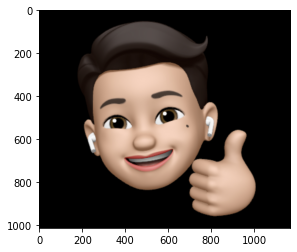

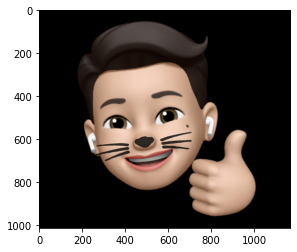

In [22]:
son_image = os.getenv('HOME')+'/aiffel/camera_sticker/images/ÏÜêÏäπÏö∞ÎØ∏Î™®ÏßÄ.png'

# sana_image = "sana.jpg"

son = CatWhiskersSticker(son_image, model_path, sticker_path)
son.show_original_image() # ÏõêÎ≥∏ Ïù¥ÎØ∏ÏßÄ Ï∂úÎ†•
son.put_cat_whiskers() # Í≥†ÏñëÏù¥ ÏàòÏóº Ïä§Ìã∞Ïª§ Î∂ôÏù∏ Ïù¥ÎØ∏ÏßÄ Ï∂úÎ†•

In [23]:
img = cv2.imread(son_image) # Ïù¥ÎØ∏ÏßÄ ÏùΩÏñ¥Ïò§Í∏∞

center_point = (img.shape[1] / 2, img.shape[0] / 2) # ÌöåÏ†Ñ Ï§ëÏã¨Ï†êÏùÄ Ïù¥ÎØ∏ÏßÄÏùò Ï†ïÏ§ëÏïô

# Ïù¥ÎØ∏ÏßÄÎ•º 30ÎèÑÏî© ÌöåÏ†ÑÌï¥ÏÑú Ï†ÄÏû•
for i in range(12):
    rot = cv2.getRotationMatrix2D(center_point, i * 30, 1)
    rotated_img = cv2.warpAffine(img, rot, (0, 0))
    cv2.imwrite(f"rotated_iu({i}).png", rotated_img)

DEGREE:  0


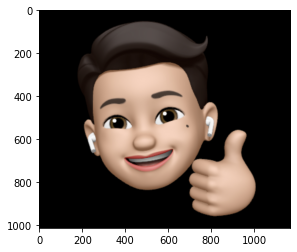

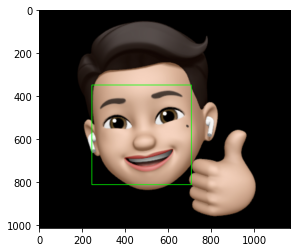

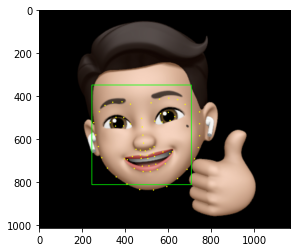

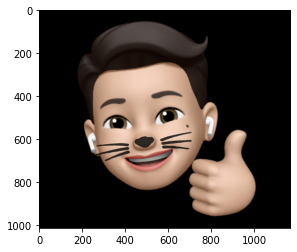

DEGREE:  30


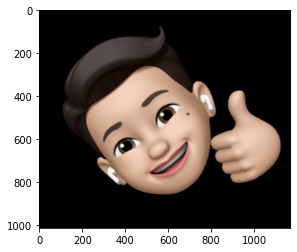

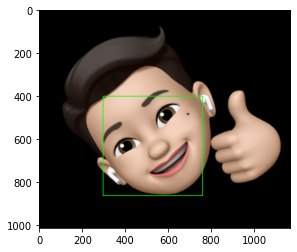

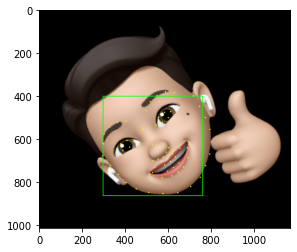

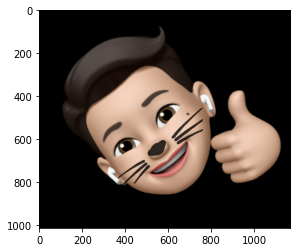

DEGREE:  60


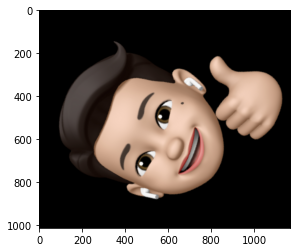

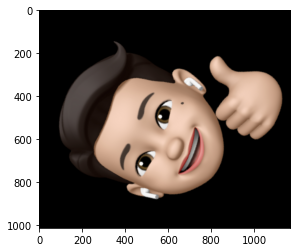

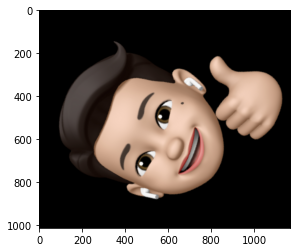

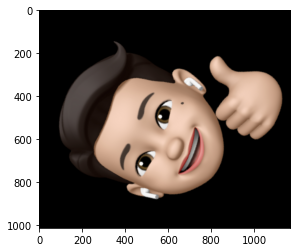

DEGREE:  90


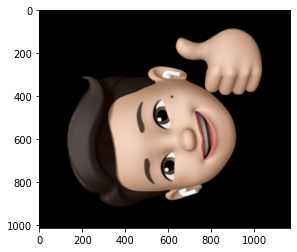

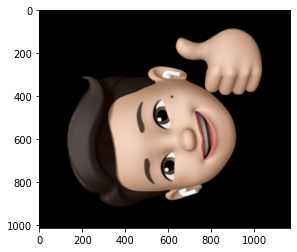

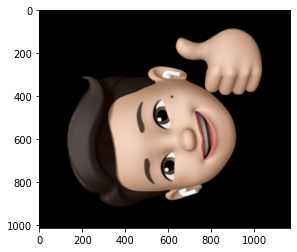

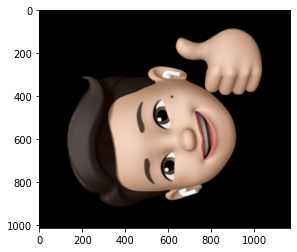

DEGREE:  120


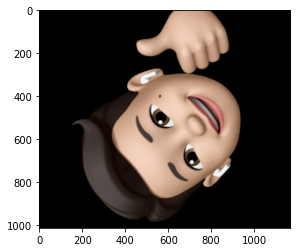

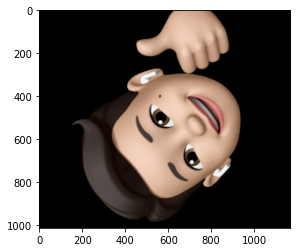

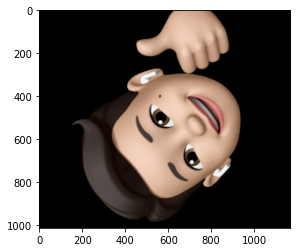

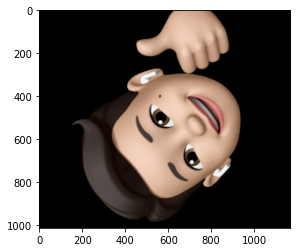

DEGREE:  150


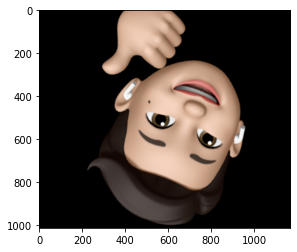

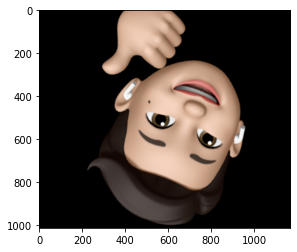

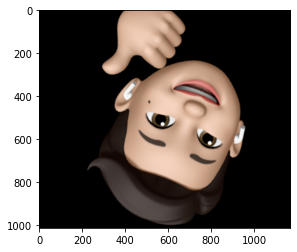

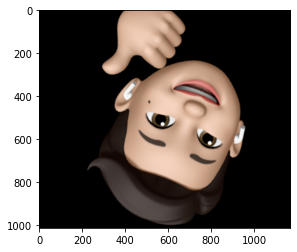

DEGREE:  180


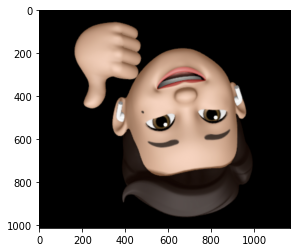

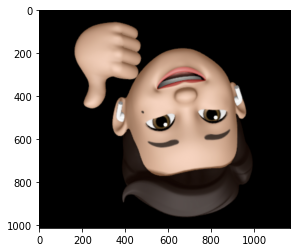

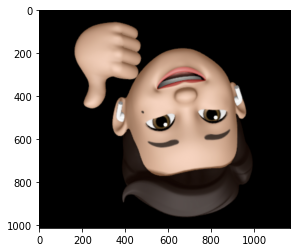

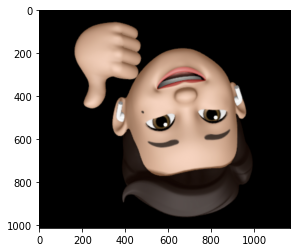

DEGREE:  210


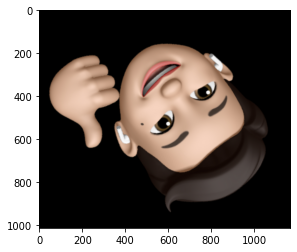

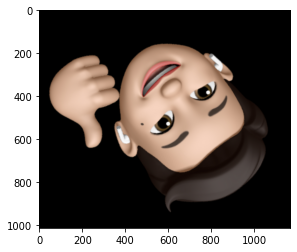

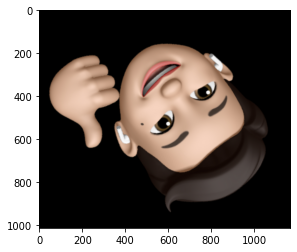

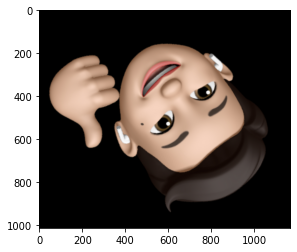

DEGREE:  240


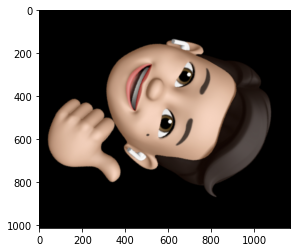

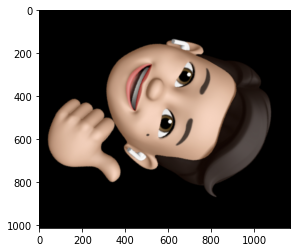

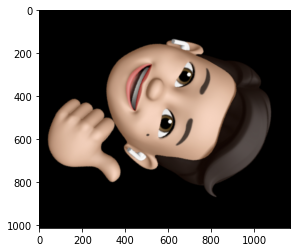

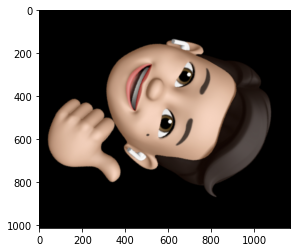

DEGREE:  270


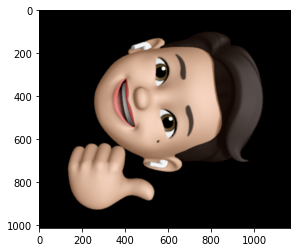

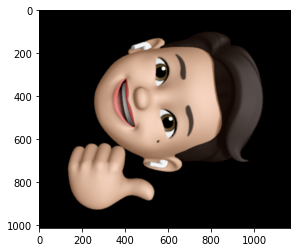

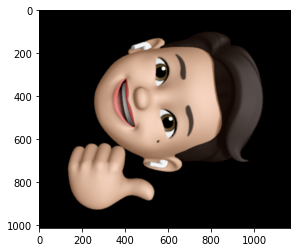

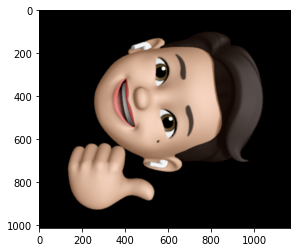

DEGREE:  300


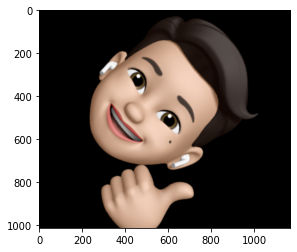

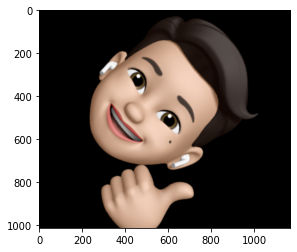

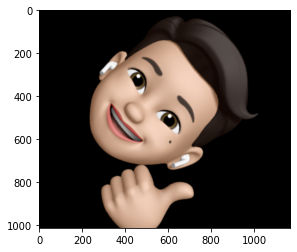

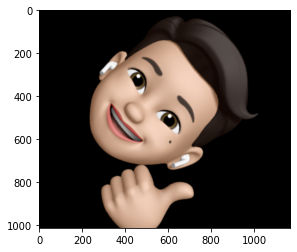

DEGREE:  330


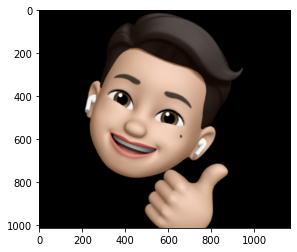

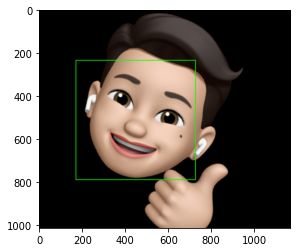

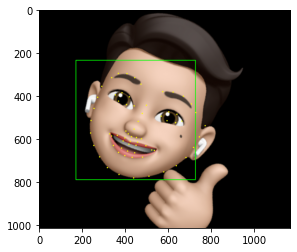

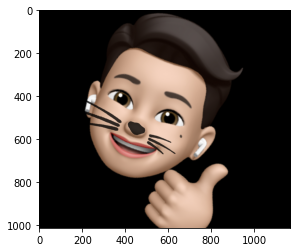

In [24]:
for i in range(12):
    img = f"rotated_iu({i}).png"
    iu = CatWhiskersSticker(img, model_path, sticker_path)
    print("DEGREE: ", i * 30)
    iu.show_original_image()
    iu.show_face_rectangle()
    iu.show_landmarks()
    iu.put_cat_whiskers()
    print("=" * 30)